In [1]:
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

2022-12-05 16:51:57.893056: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 16:51:58.227280: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-05 16:51:58.227301: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-05 16:51:58.272421: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-05 16:51:59.158246: W tensorflow/stream_executor/platform/de

In [2]:
max_features = 20000
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

pad_size_dict = {}
for max_len in [10, 300, 600]:
    x_train = pad_sequences(x_train, maxlen=max_len)
    x_test = pad_sequences(x_test, maxlen=max_len)
    pad_size_dict[max_len] = (x_train, x_test)

In [3]:
model_layers_dict = {}
for k, v in pad_size_dict.items():
    model_layers_dict[k] = [
        Embedding(max_features, 16, mask_zero=True),
        SimpleRNN(32, input_shape=(max_features,k), kernel_regularizer='l2'),
        Dropout(0.1),
        Dense(1, activation='sigmoid'),
    ]

models = {}

for k, v in model_layers_dict.items():
    model = Sequential(v)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    models[k] = model
    print(k)
    model.summary()

10
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 321,601
Trainable params: 321,601
Non-trainable params: 0
_________________________________________________________________


2022-12-05 16:52:03.041350: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-05 16:52:03.041612: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-05 16:52:03.041635: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kamilasproska-VivoBook-ASUSLaptop-X515UA-M515UA): /proc/driver/nvidia/version does not exist
2022-12-05 16:52:03.042196: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


300
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                1568      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321,601
Trainable params: 321,601
Non-trainable params: 0
_________________________________________________________________
600
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embe

In [4]:
history_dict = {}
for k, model in tqdm(models.items()):
    x_train, x_test = pad_size_dict[k]
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))
    history_dict[k] = history

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/5
782/782 [==============================] - 8s 9ms/step - loss: 0.6467 - accuracy: 0.6555 - val_loss: 0.5536 - val_accuracy: 0.7212
Epoch 2/5
782/782 [==============================] - 6s 8ms/step - loss: 0.4795 - accuracy: 0.7796 - val_loss: 0.5849 - val_accuracy: 0.7208
Epoch 3/5
782/782 [==============================] - 6s 8ms/step - loss: 0.3982 - accuracy: 0.8314 - val_loss: 0.6023 - val_accuracy: 0.7220
Epoch 4/5
782/782 [==============================] - 8s 10ms/step - loss: 0.3018 - accuracy: 0.8813 - val_loss: 0.6919 - val_accuracy: 0.6978
Epoch 5/5
782/782 [==============================] - 7s 9ms/step - loss: 0.2277 - accuracy: 0.9187 - val_loss: 0.7859 - val_accuracy: 0.6933


 33%|███▎      | 1/3 [00:35<01:10, 35.24s/it]

Epoch 1/5
782/782 [==============================] - 89s 113ms/step - loss: 0.6350 - accuracy: 0.6742 - val_loss: 0.5523 - val_accuracy: 0.7193
Epoch 2/5
782/782 [==============================] - 84s 107ms/step - loss: 0.4752 - accuracy: 0.7813 - val_loss: 0.5517 - val_accuracy: 0.7216
Epoch 3/5
782/782 [==============================] - 87s 112ms/step - loss: 0.3995 - accuracy: 0.8294 - val_loss: 0.5835 - val_accuracy: 0.7100
Epoch 4/5
782/782 [==============================] - 95s 121ms/step - loss: 0.3300 - accuracy: 0.8650 - val_loss: 0.6516 - val_accuracy: 0.7022
Epoch 5/5
782/782 [==============================] - 94s 120ms/step - loss: 0.2770 - accuracy: 0.8912 - val_loss: 0.7237 - val_accuracy: 0.6824


 67%|██████▋   | 2/3 [08:04<04:38, 278.62s/it]

Epoch 1/5
782/782 [==============================] - 181s 230ms/step - loss: 0.6501 - accuracy: 0.6517 - val_loss: 0.5592 - val_accuracy: 0.7174
Epoch 2/5
782/782 [==============================] - 177s 226ms/step - loss: 0.4823 - accuracy: 0.7769 - val_loss: 0.5456 - val_accuracy: 0.7251
Epoch 3/5
782/782 [==============================] - 175s 224ms/step - loss: 0.4049 - accuracy: 0.8257 - val_loss: 0.5833 - val_accuracy: 0.7164
Epoch 4/5
782/782 [==============================] - 179s 229ms/step - loss: 0.3182 - accuracy: 0.8735 - val_loss: 0.6727 - val_accuracy: 0.7031
Epoch 5/5
782/782 [==============================] - 171s 219ms/step - loss: 0.2480 - accuracy: 0.9092 - val_loss: 0.7416 - val_accuracy: 0.6764


100%|██████████| 3/3 [22:47<00:00, 455.94s/it]


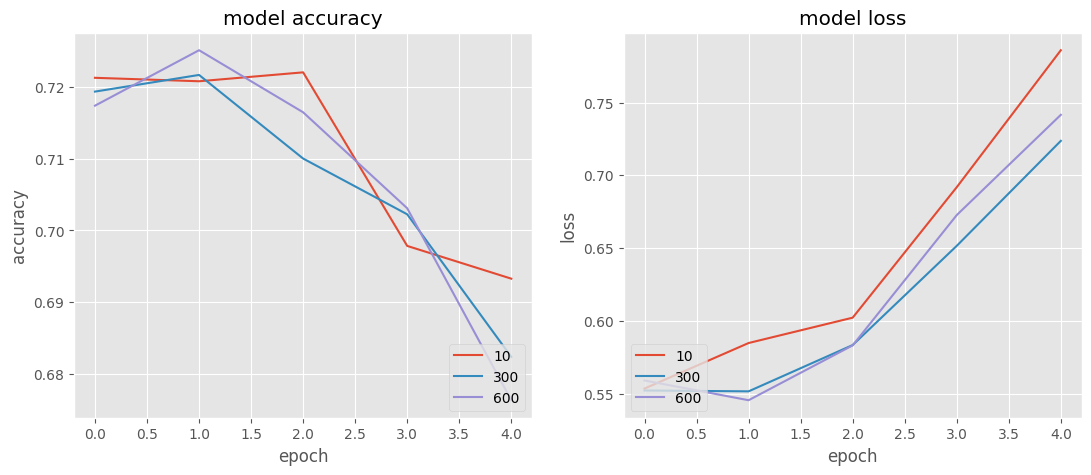

In [5]:
plt.style.use('ggplot')
fig, axis = plt.subplots(1, 2)
fig.set_size_inches(13, 5)

for k, history in history_dict.items():
    plt.sca(axis[0])
    plt.plot(history.history['val_accuracy'], label=k)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='lower right')

    plt.sca(axis[1])
    plt.plot(history.history['val_loss'], label=k)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='lower left')
plt.savefig(f'plots/'+ " ".join([str(x) for x in models.keys()]) + '.png');